<a href="https://colab.research.google.com/github/rahmat412/sentora-core/blob/master/classification_kendaraan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

In this classification, there are 3 model that using for the classification.

*  the first model is using naive bayes classifier
*  the second model is using k-nearest neighbor classifier
*  the third model is using decision tree classifier
*  the preprocessing data that is use in every model is same, the difference only between the classifier

The aim for this project is to define the difference accuracy between the models


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import module to standardize the scale(normalization)
from sklearn.preprocessing import StandardScaler

#import the classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Python script for confusion matrix creation. 
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix, classification_report

### Getting the basic understanding of the data


In [2]:
df_train = pd.read_csv('kendaraan_train.csv')
df_test = pd.read_csv('kendaraan_test.csv')

In [3]:
# concate the data for data exploration purpose
frames = [df_train, df_test]
df = pd.concat(frames).reset_index(drop=True)
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2.0,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3.0,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4.0,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5.0,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [4]:
df.info()

# some of the object will need an encoding before processing to the machine learning modeling
# id column will be dropped because it will not affect anything in our analysis and machine learning process


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333470 entries, 0 to 333469
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  float64
 1   Jenis_Kelamin      319030 non-null  object 
 2   Umur               319256 non-null  float64
 3   SIM                319066 non-null  float64
 4   Kode_Daerah        319164 non-null  float64
 5   Sudah_Asuransi     319241 non-null  float64
 6   Umur_Kendaraan     319195 non-null  object 
 7   Kendaraan_Rusak    319282 non-null  object 
 8   Premi              318901 non-null  float64
 9   Kanal_Penjualan    319171 non-null  float64
 10  Lama_Berlangganan  319478 non-null  float64
 11  Tertarik           333470 non-null  int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 30.5+ MB


In [5]:
df.describe()

# the average customers Lama_Berlangganan (numbers of day been insured in the compant is 154 days)
# no customers in this data set have been with the insurance company for 1 full year
# the oldest customers in this dataset is 85 while the median is 36 
# the most expensive annual premium is almost 17 times more expensive compared to the median annual premium
# this data definitely need a scalling to get a better result in the machine learning process 

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,319256.000000,319066.000000,319164.000000,319241.000000,318901.000000,319171.000000,319478.000000,333470.000000
mean,142916.000000,38.840028,0.997859,26.394380,0.458603,30550.097899,112.045299,154.310350,0.122551
std,82512.446734,15.526398,0.046217,13.246852,0.498284,17192.548724,54.196470,83.686932,0.327921
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24397.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31660.000000,133.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39392.000000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df.describe(include = 'O')

## majority of the health insurance owner is male

,Jenis_Kelamin,Umur_Kendaraan,Kendaraan_Rusak
count,319030,319195,319282
unique,2,3,2
top,Pria,1-2 Tahun,Pernah
freq,172548,167727,161164


In [7]:
## knowing all the unique value in the columns 

df_unique = df.drop(columns = 'id')

for column in df_unique.columns:
    print(f"{column}: ")
    print("")
    print(df_unique[column].unique())
    print("")


Jenis_Kelamin: 

['Wanita' 'Pria' nan]

Umur: 

[30. 48. 21. 58. 50. 33. 23. 20. 54. 25. nan 66. 31. 24. 22. 52. 26. 46.
 41. 45. 29. 68. 73. 27. 34. 60. 44. 47. 75. 38. 35. 53. 71. 59. 57. 65.
 51. 39. 37. 28. 36. 67. 49. 42. 72. 69. 63. 40. 32. 76. 56. 43. 64. 55.
 61. 80. 78. 70. 74. 62. 77. 79. 82. 81. 85. 84. 83.]

SIM: 

[ 1. nan  0.]

Kode_Daerah: 

[33. 39. 46. 48. 35.  8. 28. 29. 14. 12. nan 24. 30. 15.  9. 11. 10. 34.
 16.  3. 36. 47. 49. 38. 43. 44.  6. 41. 37. 31. 26. 18. 13. 20. 45. 50.
 32.  2. 21.  7. 52. 17.  4.  0. 25. 23. 40.  5. 27. 19. 42.  1. 22. 51.]

Sudah_Asuransi: 

[ 1.  0. nan]

Umur_Kendaraan: 

['< 1 Tahun' '> 2 Tahun' '1-2 Tahun' nan]

Kendaraan_Rusak: 

['Tidak' 'Pernah' nan]

Premi: 

[28029. 25800. 32733. ... 16922. 86562. 68474.]

Kanal_Penjualan: 

[152.  29. 160. 124.  88. 145.  31.  nan  26. 156. 122.   7. 154.  25.
  12.  11. 151. 133. 157.  30.  13.   1.  52.  23.  14.  16. 163.   4.
 138.  55.   8. 155. 125.  24.  22. 120.   3.  94. 153. 131.  60

## Handling null values, Handling outliers, and encoding process


In [8]:
print(df_train.isna().sum())
print(df_test.isna().sum())
## for train data apparently there are many feature that has null value in all the rows and columns so we have to drop the columns
## for test data there are no missing values

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


In [9]:
df_train = df.dropna()
df = df.dropna()

In [10]:
df = df.drop(columns = 'id')
df.head()

# id wont be needed in the analysis and it wont be needed for the machine learning process so it's kind of redundant to keep it

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
5,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
8,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0


In [11]:
# change all column type to integer for data exploration
for column in df.describe().columns:
    df[column] = df[column].astype(int)
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30,1,33,1,< 1 Tahun,Tidak,28029,152,97,0
1,Pria,48,1,39,0,> 2 Tahun,Pernah,25800,29,158,0
3,Wanita,58,1,48,0,1-2 Tahun,Tidak,2630,124,63,0
5,Pria,21,1,35,1,< 1 Tahun,Tidak,22735,152,171,0
8,Wanita,20,1,8,1,< 1 Tahun,Tidak,30786,160,31,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

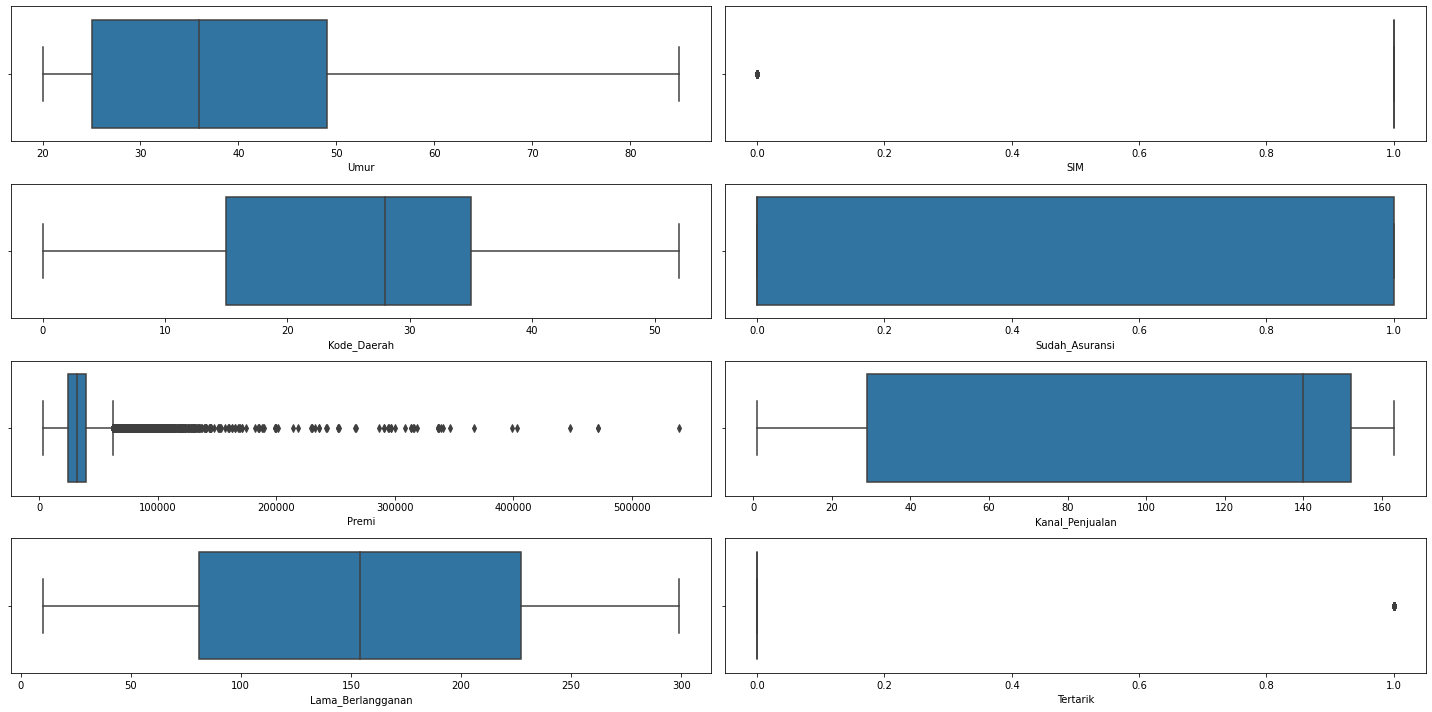

In [12]:
## Looking at the box plot to check all the outliers 

plt.figure(figsize = (20, 10))

for i, column in enumerate(df.describe().columns):
    plt.subplot(4,2, i+1)
    sns.boxplot(df[column])

plt.tight_layout()
plt.show()

# from the boxplot below we can see that there's a lot of outliers in the annual premium
# this will need to be scaled with standard scaler to better the eva matrix / binning

### Encoding Object columns

#### Encoding 'Jenis_Kelamin'

In [13]:
df['Jenis_Kelamin'] = df['Jenis_Kelamin'].map( {'Wanita':0, 'Pria':1})
df_train['Jenis_Kelamin'] = df_train['Jenis_Kelamin'].map( {'Wanita':0, 'Pria':1})
df_test['Jenis_Kelamin'] = df_test['Jenis_Kelamin'].map( {'Wanita':0, 'Pria':1})
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,30,1,33,1,< 1 Tahun,Tidak,28029,152,97,0
1,1,48,1,39,0,> 2 Tahun,Pernah,25800,29,158,0
3,0,58,1,48,0,1-2 Tahun,Tidak,2630,124,63,0
5,1,21,1,35,1,< 1 Tahun,Tidak,22735,152,171,0
8,0,20,1,8,1,< 1 Tahun,Tidak,30786,160,31,0


#### Encoding Umur_Kendaraan

In [14]:
df['Umur_Kendaraan'] = df['Umur_Kendaraan'].map( {'< 1 Tahun':0, '1-2 Tahun':1, '> 2 Tahun':2})
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].map( {'< 1 Tahun':0, '1-2 Tahun':1, '> 2 Tahun':2})
df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].map( {'< 1 Tahun':0, '1-2 Tahun':1, '> 2 Tahun':2})
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,30,1,33,1,0,Tidak,28029,152,97,0
1,1,48,1,39,0,2,Pernah,25800,29,158,0
3,0,58,1,48,0,1,Tidak,2630,124,63,0
5,1,21,1,35,1,0,Tidak,22735,152,171,0
8,0,20,1,8,1,0,Tidak,30786,160,31,0


#### Encoding Kendaraan_Rusak

In [15]:
df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].map( {'Tidak':0, 'Pernah':1})
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].map( {'Tidak':0, 'Pernah':1})
df_test['Kendaraan_Rusak'] = df_test['Kendaraan_Rusak'].map( {'Tidak':0, 'Pernah':1})
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,30,1,33,1,0,0,28029,152,97,0
1,1,48,1,39,0,2,1,25800,29,158,0
3,0,58,1,48,0,1,0,2630,124,63,0
5,1,21,1,35,1,0,0,22735,152,171,0
8,0,20,1,8,1,0,0,30786,160,31,0


In [16]:
df.info()

# Now all column are in int or float value and ready to be machine learning processed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171068 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Jenis_Kelamin      171068 non-null  int64
 1   Umur               171068 non-null  int64
 2   SIM                171068 non-null  int64
 3   Kode_Daerah        171068 non-null  int64
 4   Sudah_Asuransi     171068 non-null  int64
 5   Umur_Kendaraan     171068 non-null  int64
 6   Kendaraan_Rusak    171068 non-null  int64
 7   Premi              171068 non-null  int64
 8   Kanal_Penjualan    171068 non-null  int64
 9   Lama_Berlangganan  171068 non-null  int64
 10  Tertarik           171068 non-null  int64
dtypes: int64(11)
memory usage: 15.7 MB


## Mini EDA

#### Hypothesis Null

- Jenis_Kelamin is corelated With Tertarik
- Umur is correlated with Tertarik
- SIM is correlated with Tertarik
- Sudah_Asuransi is correlated with Tertarik
- Umur_Kendaraan is correlated with Tertarik 
- Kendaraan_Rusak is correlated with Tertarik
- Premi is correlated with Tertarik
- Lama_Berlangganan is correlated with Tertarik

In [17]:
df['Jenis_Kelamin'].value_counts()

# there are more Pria in this dataset compared to Wanita

1    92490
0    78578
Name: Jenis_Kelamin, dtype: int64

In [18]:
pd.crosstab(index = df['Jenis_Kelamin'], columns = df['Tertarik'], normalize = 'index')

# Dataset contain more male  than female so from perspective according to Jenis_Kelamin are equal

Tertarik,0,1
Jenis_Kelamin,,
0,0.897465,0.102535
1,0.862245,0.137755


In [19]:
pd.crosstab(index = df['Umur'], columns = df['Tertarik'], normalize = 'columns').sort_values(1, ascending = False)

Tertarik,0,1
Umur,,
44,0.019798,0.039908
43,0.019265,0.039763
45,0.019219,0.037552
46,0.018500,0.035917
47,0.017176,0.034426
...,...,...
81,0.000200,0.000048
82,0.000093,0.000000
83,0.000073,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


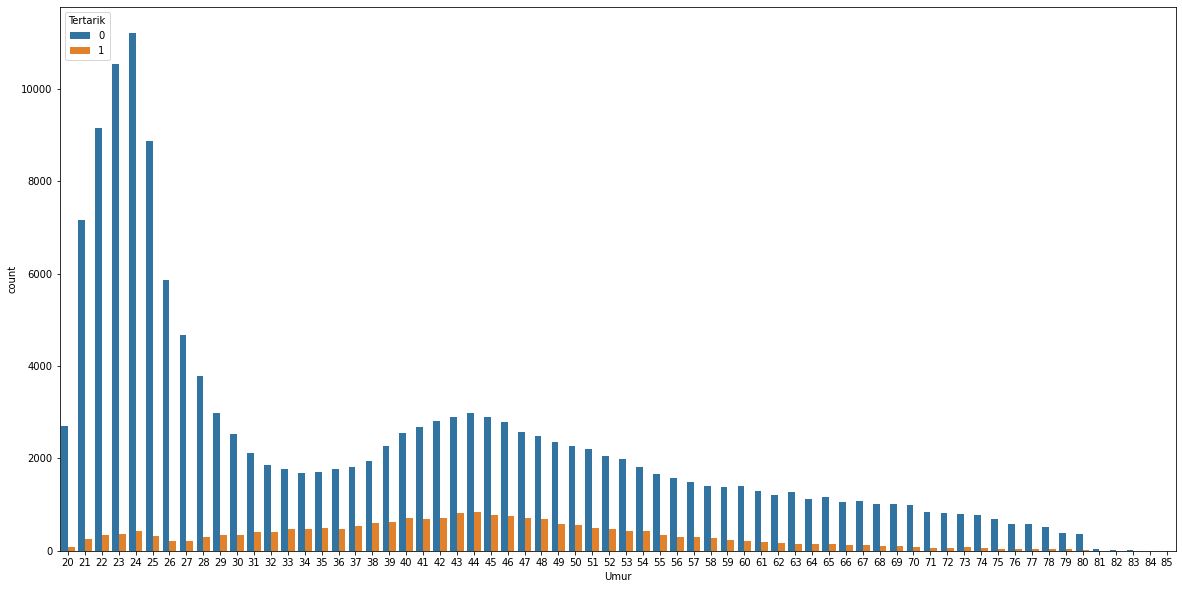

In [20]:
plt.figure(figsize = (20, 10))
sns.countplot(df['Umur'], hue = df['Tertarik'])

## people Umurs between from 38 to 50 are more likely to respond
# while people Umurs between 20 to 30 are less likely to respond

In [21]:
df['SIM'].value_counts(normalize= True)
# the number of people who doesn't have a SIM is very small in this dataset

1    0.997931
0    0.002069
Name: SIM, dtype: float64

In [22]:
pd.crosstab(index = df['SIM'], columns = df['Tertarik'], normalize = 'index')
# Since More most of the people has a SIM, majoriity of the Tertarik that say yes are from people who has SIM

Tertarik,0,1
SIM,,
0,0.940678,0.059322
1,0.878294,0.121706


In [23]:
df['Sudah_Asuransi'].value_counts(normalize = True)

0    0.540206
1    0.459794
Name: Sudah_Asuransi, dtype: float64

In [24]:
pd.crosstab(index = df['Sudah_Asuransi'], columns = df['Tertarik'], normalize = 'index')

# people who previously Insured are less likely to Tertarik compared to people who was not previously insured

Tertarik,0,1
Sudah_Asuransi,,
0,0.77570,0.22430
1,0.99911,0.00089


In [25]:
pd.crosstab(index = df['Umur_Kendaraan'], columns = df['Tertarik'], normalize = 'columns')

# 0  = Vehicle Umur < 1 year
# 1 = Vehicle Umur 1 - 2 year
# 2 = Vehicle Umur > 2 years

# people that has vehicle for more than 2 years are more likely to Tertarik 
# people whos has newer vehicle are less likely to Tertarik 

Tertarik,0,1
Umur_Kendaraan,,
0,0.472556,0.154871
1,0.493698,0.744062
2,0.033746,0.101067


In [26]:
pd.crosstab(index = df['Kendaraan_Rusak'], columns = df['Tertarik'], normalize = 'index')

# People who has a Kendaraan_Rusak are more likely to Tertarik since they know the concequences
# People who don't have a Kendaraan_Rusak Are less likely to Tertarik 

Tertarik,0,1
Kendaraan_Rusak,,
0,0.994939,0.005061
1,0.763958,0.236042


In [27]:
pd.crosstab(index = df['Tertarik'], columns = 'Test', values = df['Premi'], aggfunc = 'median')

col_0,Test
Tertarik,
0,31437
1,32984


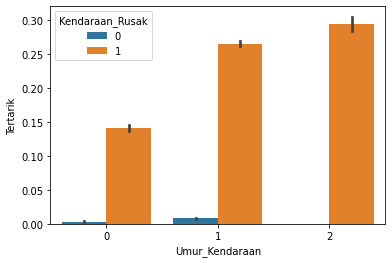

In [28]:
sns.barplot(x = df['Umur_Kendaraan'], y= df['Tertarik'], hue = df['Kendaraan_Rusak'])

# Customer who has more than 2 years car Umur has a more likely to have Kendaraan_Rusak and more likely to Tertarik to vehicle insurance
# Customer who has a Kendaraan_Rusak are more like to Tertarik to Insurance as well

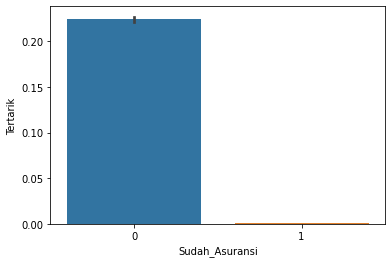

In [29]:
sns.barplot(x = df['Sudah_Asuransi'], y = df['Tertarik'])

# Customer who was not previously insured are more likely to respond  to the vehicle insurance compared to the customer who was previously insured

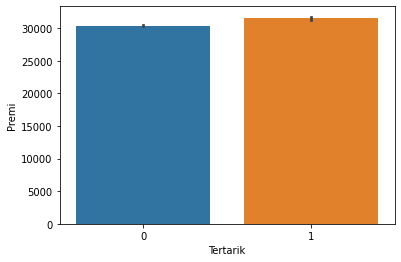

In [30]:
sns.barplot(x = 'Tertarik', y ='Premi', data = df)

# People who Tertarik have slightly higher annual premium 

In [31]:
df['Tertarik'].value_counts(normalize = True)

# This Data has more not 'tertarik'

0    0.878423
1    0.121577
Name: Tertarik, dtype: float64

#### Correlation 

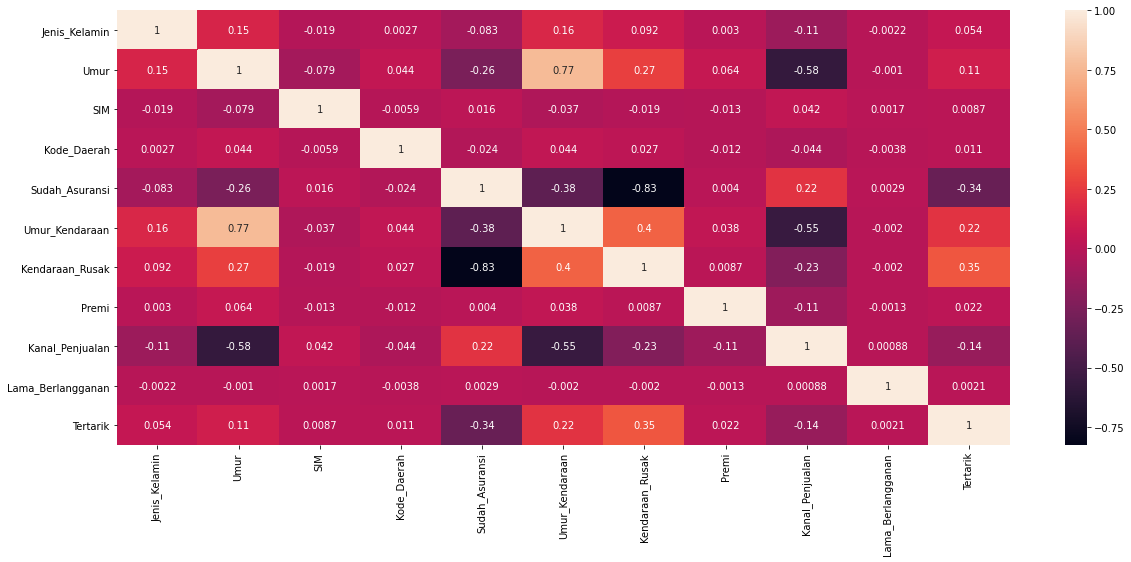

In [32]:
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True)

In [33]:
correlation = df.corr()
correlation['Tertarik'].sort_values(ascending = False)[1:]

# Sorting Column Correlation 

Kendaraan_Rusak      0.353388
Umur_Kendaraan       0.221659
Umur                 0.108912
Jenis_Kelamin        0.053709
Premi                0.021890
Kode_Daerah          0.011152
SIM                  0.008675
Lama_Berlangganan    0.002143
Kanal_Penjualan     -0.140968
Sudah_Asuransi      -0.340711
Name: Tertarik, dtype: float64

#### Feature Selection, Spliting, and Scaling

In [34]:
features = ['Umur',	'Sudah_Asuransi',	'Umur_Kendaraan',	'Kendaraan_Rusak',	'Premi']

In [35]:
train_feat_scale = StandardScaler().fit_transform(df_train[features])
X_train = pd.DataFrame(data = train_feat_scale, columns=features)
X_train

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi
0,-0.567753,1.083923,-1.071127,-1.008925,-0.144979
1,0.591171,-0.922575,2.452328,0.991154,-0.275404
2,1.235018,-0.922575,0.690601,-1.008925,-1.631139
3,-1.147215,1.083923,-1.071127,-1.008925,-0.454745
4,-1.211599,1.083923,-1.071127,-1.008925,0.016340
...,...,...,...,...,...
171063,-1.018445,1.083923,-1.071127,-1.008925,-0.264403
171064,-1.147215,1.083923,-1.071127,-1.008925,0.829664
171065,-1.018445,1.083923,-1.071127,-1.008925,1.126030
171066,1.878864,1.083923,0.690601,-1.008925,-0.000219


In [36]:
test_feat_scale = StandardScaler().fit_transform(df_test[features])
X_test = pd.DataFrame(data = test_feat_scale, columns=features)
X_test

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi
0,0.655011,-0.918524,0.692517,0.990744,0.938632
1,-1.081474,1.088703,-1.070660,-1.009343,0.516962
2,-0.952846,1.088703,-1.070660,-1.009343,4.588010
3,0.462068,1.088703,0.692517,-1.009343,0.324024
4,-0.245389,-0.918524,0.692517,0.990744,-0.210489
...,...,...,...,...,...
47634,1.426782,-0.918524,2.455694,0.990744,0.023702
47635,0.140497,-0.918524,0.692517,0.990744,-1.608567
47636,-0.952846,1.088703,-1.070660,-1.009343,0.142176
47637,1.298153,-0.918524,0.692517,0.990744,0.411473


In [37]:
y_train = df_train['Tertarik']
y_train

0         0
1         0
3         0
5         0
8         0
         ..
285826    0
285827    0
285828    0
285829    0
285830    0
Name: Tertarik, Length: 171068, dtype: int64

In [38]:
y_test = df_test['Tertarik']
y_test

0        0
1        0
2        0
3        0
4        0
        ..
47634    0
47635    0
47636    0
47637    1
47638    0
Name: Tertarik, Length: 47639, dtype: int64

# **Classification**

Now all the step on data preprocessing is finish, the next phase is we do our **classification**

in this phase we do the classification using 3 classifier.
1. Naive Bayes (Gaussian)
2. KNN
3. Decision tree

The first classifier is **Naive bayes**

In [39]:
#using Gaussian Naive Bayes to predict the class
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_NB = gnb.predict(X_test)
#return the prediction
y_pred_NB

array([1, 0, 0, ..., 0, 1, 0])

The second classifier is **K Nearest Neighbord (KNN)**

In [40]:
#using the knn to predict the class
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_KNN = model_knn.predict(X_test)
#return the prediction
y_pred_KNN

array([0, 0, 0, ..., 0, 0, 0])

The third classifier is **Decision Tree**

In [41]:
#using the decision tree to predict the class
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(X_train,y_train)
y_pred_DT = model_dt.predict(X_test)
#return the prediction
y_pred_DT

array([0, 0, 0, ..., 0, 0, 0])

**Print the result class**

note : the value of the class label (transmission column) is has 2 values (0, 1)

In [42]:
y_true = y_test
result_class = pd.DataFrame({
    'Actual Labels': y_true,
    'Naive Bayes': y_pred_NB,
    'KNN' : y_pred_KNN,
    'Decision Tree' : y_pred_DT
})

result_class

,Actual Labels,Naive Bayes,KNN,Decision Tree
0,0,1,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,1,0,0
...,...,...,...,...
47634,0,1,0,0
47635,0,1,0,0
47636,0,0,0,0
47637,1,1,0,0


In [43]:
result_count = pd.DataFrame({
    'Actual labels': result_class['Actual Labels'].value_counts(),
    'Naive Bayes': result_class['Naive Bayes'].value_counts(),
    'KNN' : result_class['KNN'].value_counts(),
    'Decision Tree' : result_class['Decision Tree'].value_counts()
})

result_count

,Actual labels,Naive Bayes,KNN,Decision Tree
0,41778,24836,44746,42879
1,5861,22803,2893,4760


# **Accuracy**

in this phase we calculate the **Accuraccy, Confussion Matrix, Precision, Recall,F1-Score, Support** of every model. 

**Naive Bayes**

[[24694 17084]
 [  142  5719]]
Confusion Matrix Naive Bayes Classifier :


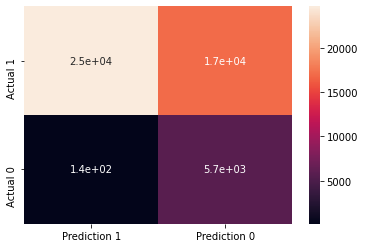

In [44]:
# print the Confusion Matrix, Acuracy Score, and Report (precision, recallm f1-score, support)
results_NB = confusion_matrix(y_true, y_pred_NB)
print(results_NB)
print('Confusion Matrix Naive Bayes Classifier :')
cm_NB = pd.DataFrame(data = results_NB, index = ["Actual 1","Actual 0"], columns = ["Prediction 1", "Prediction 0"])
sns.heatmap(cm_NB, annot = True)

In [45]:
acc_NB = accuracy_score(y_test, y_pred_NB)
prec_NB = precision_score(y_test, y_pred_NB)
rec_NB = recall_score(y_test, y_pred_NB)
f1_NB = f1_score(y_test,y_pred_NB)

print('Report : ')
print(classification_report(y_true, y_pred_NB))

Report : 
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.98      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639



**KNN**

[[39808  1970]
 [ 4938   923]]
Confusion Matrix :


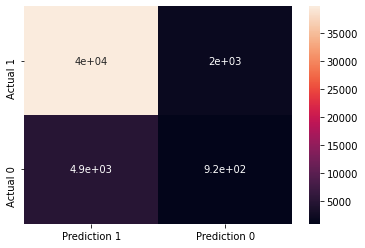

In [46]:
#print the Confusion Matrix, Acuracy Score, and Report (precision, recallm f1-score, support)
results_KNN = confusion_matrix(y_true, y_pred_KNN)
print(results_KNN)
print('Confusion Matrix :')
cm_KNN = pd.DataFrame(data = results_KNN, index = ["Actual 1","Actual 0"], columns = ["Prediction 1", "Prediction 0"])
sns.heatmap(cm_KNN, annot = True)

In [47]:
acc_KNN = accuracy_score(y_test, y_pred_KNN)
prec_KNN = precision_score(y_test, y_pred_KNN)
rec_KNN = recall_score(y_test, y_pred_KNN)
f1_KNN = f1_score(y_test,y_pred_KNN)

print('Report : ')
print(classification_report(y_true, y_pred_KNN))

Report : 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     41778
           1       0.32      0.16      0.21      5861

    accuracy                           0.85     47639
   macro avg       0.60      0.56      0.57     47639
weighted avg       0.82      0.85      0.83     47639



**Decision Tree**

[[38404  3374]
 [ 4475  1386]]
Confusion Matrix :


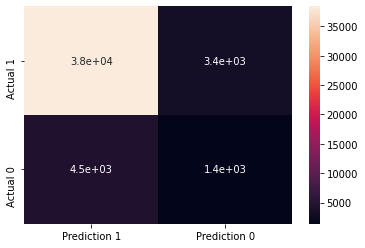

In [48]:
# print the Confusion Matrix, Acuracy Score, and Report (precision, recallm f1-score, support)
results_DT = confusion_matrix(y_true, y_pred_DT)
print(results_DT)
print('Confusion Matrix :')
cm_DT = pd.DataFrame(data = results_DT, index = ["Actual 1","Actual 0"], columns = ["Prediction 1", "Prediction 0"])
sns.heatmap(cm_DT, annot = True)

In [49]:
acc_DT = accuracy_score(y_test, y_pred_DT)
prec_DT = precision_score(y_test, y_pred_DT)
rec_DT = recall_score(y_test, y_pred_DT)
f1_DT = f1_score(y_test,y_pred_DT)

print('Report : ')
print(classification_report(y_true, y_pred_DT))

Report : 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     41778
           1       0.29      0.24      0.26      5861

    accuracy                           0.84     47639
   macro avg       0.59      0.58      0.58     47639
weighted avg       0.82      0.84      0.83     47639



In [50]:
eva_mat = {
    "Naive Bayes": [acc_NB, prec_NB, rec_NB, f1_NB],
    "KNN": [acc_KNN, prec_KNN, rec_KNN, f1_KNN],
    "Decision Tree": [acc_DT, prec_DT, rec_DT, f1_DT]
    }

evaluation = pd.DataFrame(data = eva_mat, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
evaluation

,Naive Bayes,KNN,Decision Tree
Accuracy,0.638406,0.854993,0.835240
Precision,0.250800,0.319046,0.291176
Recall,0.975772,0.157482,0.236478
F1-Score,0.399037,0.210875,0.260992


In [51]:
# concat the classification result
df1 = df_test[features].reset_index(drop=True)
df2 = result_class.reset_index(drop=True)
df_processed = pd.concat([df1, df2],axis=1)
df_processed

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Actual Labels,Naive Bayes,KNN,Decision Tree
0,49,0,1,1,46963,0,1,0,0
1,22,1,0,0,39624,0,0,0,0
2,24,1,0,0,110479,0,0,0,0
3,46,1,1,0,36266,0,0,0,0
4,35,0,1,1,26963,0,1,0,0
...,...,...,...,...,...,...,...,...,...
47634,61,0,2,1,31039,0,1,0,0
47635,41,0,1,1,2630,0,1,0,0
47636,24,1,0,0,33101,0,0,0,0
47637,59,0,1,1,37788,1,1,0,0


In [52]:
# export the processed dataset into csv file
df_processed.to_csv('export_classification_kendaraan.csv', index=True, header=True)